 Training Period information
 Accuracy for Iteration:  0
0.13007317073170732
 Accuracy for Iteration:  100
0.6801219512195122
 Accuracy for Iteration:  200
0.7777804878048781
 Accuracy for Iteration:  300
0.8139756097560975
 Accuracy for Iteration:  400
0.8365609756097561


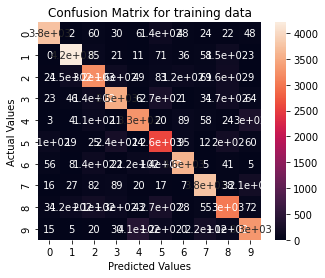

Percent of data used in training
12.435547467394601
Training time in sec below
126.83935575500004
Now it's term for calculating test data accuracy
Predicted Value:  [3]
The original labeling:  3


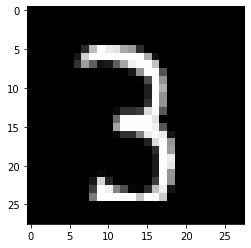

 Accuracy for this test 
0.832


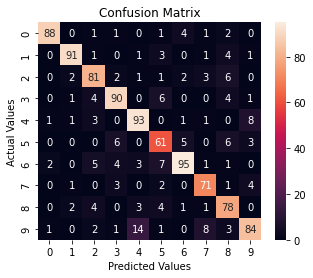

test time for iteration 1  in sec
0.7098646440000493
Predicted Value:  [1]
The original labeling:  1


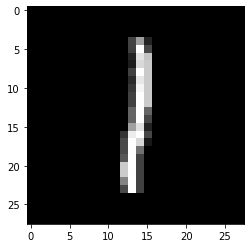

 Accuracy for this test 
0.832


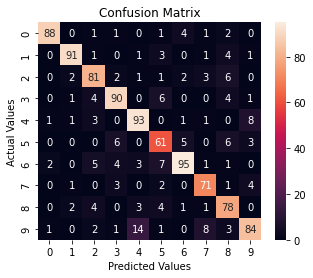

test time for iteration 2  in sec
0.6487739930000771
Predicted Value:  [8]
The original labeling:  2


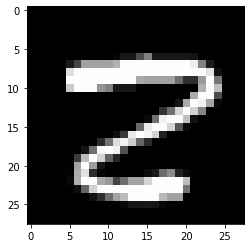

 Accuracy for this test 
0.832


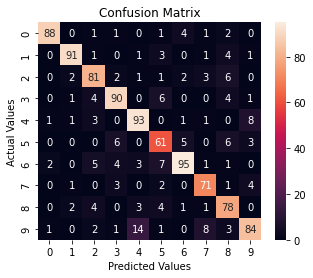

test time for iteration 3  in sec
0.748913463000008
Predicted Value:  [0]
The original labeling:  0


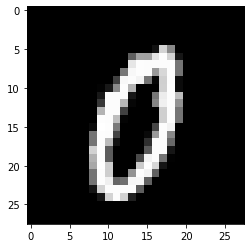

 Accuracy for this test 
0.832


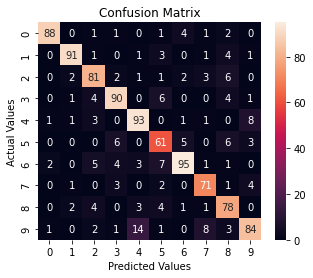

test time for iteration 4  in sec
0.6575351069999442
Predicted Value:  [2]
The original labeling:  2


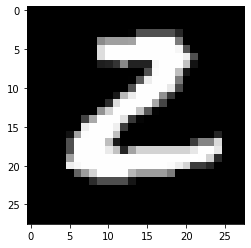

 Accuracy for this test 
0.832


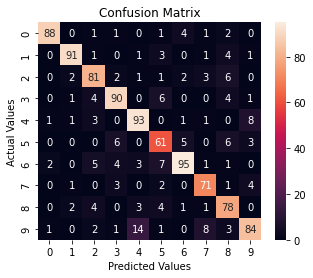

test time for iteration 5  in sec
0.6483544789999769


In [2]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from time import perf_counter, sleep


expData = pd.read_csv('/content/trainingData.csv')
start = perf_counter()
expData = np.array(expData)
#print(data.size)
shape1, shape2 = expData.shape
np.random.shuffle(expData)


data_dev = expData[0:1000].T
devY = data_dev[0]
devX = data_dev[1:shape2]
devX = devX / 255.

trainingSample = expData[1000:shape1].T
y_axis_train = trainingSample[0]
x_axis_training = trainingSample[1:shape2]
x_axis_training = x_axis_training / 255.
_,m_train = x_axis_training.shape
y_axis_train


def initialize():
    bias = 0.5
    dim_1 =10
    W1 = np.random.rand(dim_1, 784) - bias
    b1 = np.random.rand(dim_1, 1) - bias
    W2 = np.random.rand(dim_1, dim_1) - bias
    b2 = np.random.rand(dim_1, 1) - bias
    return W1, b1, W2, b2


def Activation_ReLU(Z):
    return np.maximum(Z, 0)


def Softmax(Z):
    sm = np.exp(Z) / sum(np.exp(Z))
    return sm


def forwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Activation_ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2


def Derivative_ReLU(Z):
    return Z > 0


def encLabel(Y):
    enc_Y = np.zeros((Y.size, Y.max() + 1))
    enc_Y[np.arange(Y.size), Y] = 1
    enc_Y = enc_Y.T
    return enc_Y


def backwardPropagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    encode = encLabel(Y)
    dZ2 = A2 - encode
    dW2 = 1 / shape1 * dZ2.dot(A1.T)
    db2 = 1 / shape1 * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Derivative_ReLU(Z1)
    dW1 = 1 / shape1 * dZ1.dot(X.T)
    db1 = 1 / shape1 * np.sum(dZ1)
    return dW1, db1, dW2, db2


def Update(W1, b1, W2, b2, dW1, db1, dW2, db2, learing_rate):
    W1 = W1 - learing_rate * dW1
    b1 = b1 - learing_rate * db1
    W2 = W2 - learing_rate * dW2
    b2 = b2 - learing_rate * db2
    return W1, b1, W2, b2
def PredictVal(A2):
    return np.argmax(A2, 0)

def AccuracyLevel(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradDec(X, Y, learing_rate, lim):
    W1, b1, W2, b2 = initialize()
    t = expData.size / 100
    print(" Training Period information")
    for j in range(lim):
        Z1, A1, Z2, A2 = forwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = Update(W1, b1, W2, b2, dW1, db1, dW2, db2, learing_rate)
        if j % 100 == 0:
            print(" Accuracy for Iteration: ", j)
            predVal = PredictVal(A2)
            print(AccuracyLevel(predVal, Y))
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(predVal, Y)
    cm_df = pd.DataFrame(cm,
                         index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                         columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix for training data')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("Percent of data used in training")

    a= ( Y.size / t )*100
    print(a)
    end = perf_counter()
    train_time = end - start
    print("Training time in sec below")
    print(train_time)
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradDec(x_axis_training, y_axis_train, 0.10, 500)


def calculate_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(W1, b1, W2, b2, X)

    estimation = PredictVal(A2)
    return estimation


def Testing_function(index, W1, b1, W2, b2):
    sample_data = x_axis_training[:, index, None]
    pred = calculate_prediction(x_axis_training[:, index, None], W1, b1, W2, b2)
    mark = y_axis_train[index]


    print("Predicted Value: ", pred)
    print("The original labeling: ", mark)

    sample_data = sample_data.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(sample_data, interpolation='nearest')
    plt.show()
    dev_predictions = calculate_prediction(devX, W1, b1, W2, b2)
    AccuracyLevel(dev_predictions, devY)
    print(" Accuracy for this test ")
    print(AccuracyLevel(dev_predictions, devY))
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(dev_predictions, devY)
    cm_df = pd.DataFrame(cm,
                         index=['0', '1', '2','3','4','5','6','7','8','9'],
                         columns=['0', '1', '2','3','4','5','6','7','8','9'])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
print("Now it's term for calculating test data accuracy")
start1 = perf_counter()
Testing_function(102, W1, b1, W2, b2)
end1 = perf_counter()
print("test time for iteration 1  in sec")
print(end1-start1)
start2 = perf_counter()
Testing_function(103, W1, b1, W2, b2)
end2 = perf_counter()
print("test time for iteration 2  in sec")
print(end2-start2)
start3 = perf_counter()
Testing_function(104, W1, b1, W2, b2)
end3 = perf_counter()
print("test time for iteration 3  in sec")
print(end3-start3)
start4 = perf_counter()
Testing_function(105, W1, b1, W2, b2)
end4 = perf_counter()
print("test time for iteration 4  in sec")
print(end4-start4)
start6 = perf_counter()
Testing_function(106, W1, b1, W2, b2)
end6 = perf_counter()
print("test time for iteration 5  in sec")
print(end6-start6)






# New section

# New section

# New section